In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from xgboost import plot_importance

In [5]:
data=pd.read_csv("datasets/loan_approval_dataset.csv")

In [6]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
data.shape

(4269, 13)

In [8]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [21]:
data.describe(include=object)

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [11]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

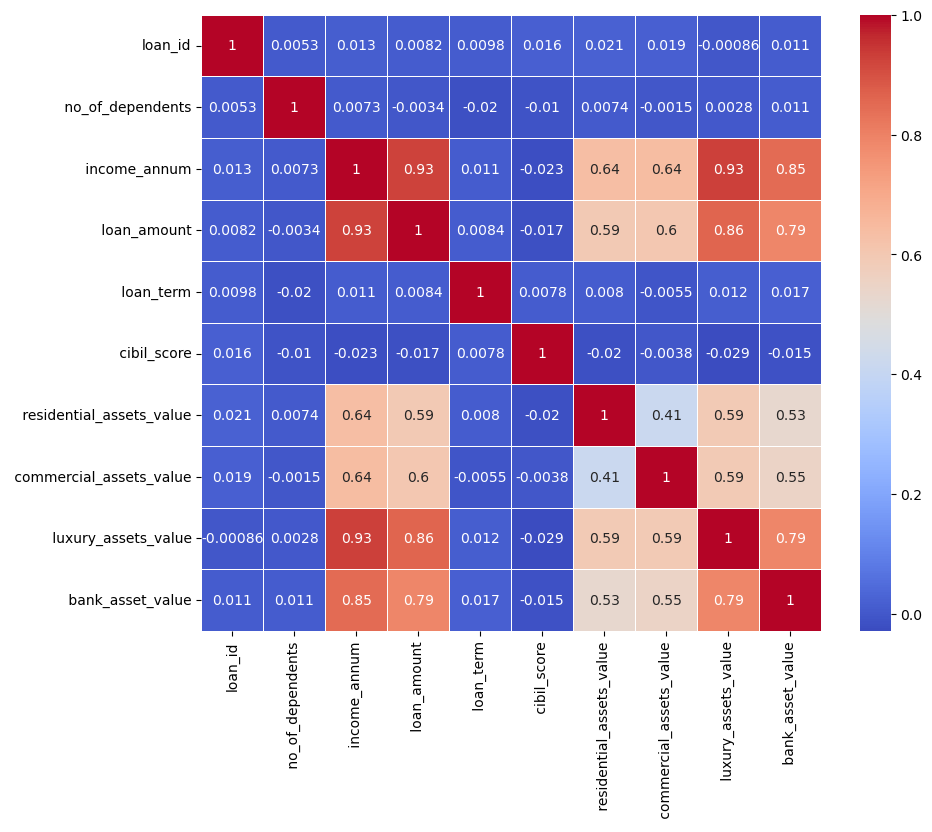

In [19]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

<AxesSubplot:xlabel=' loan_status', ylabel='count'>

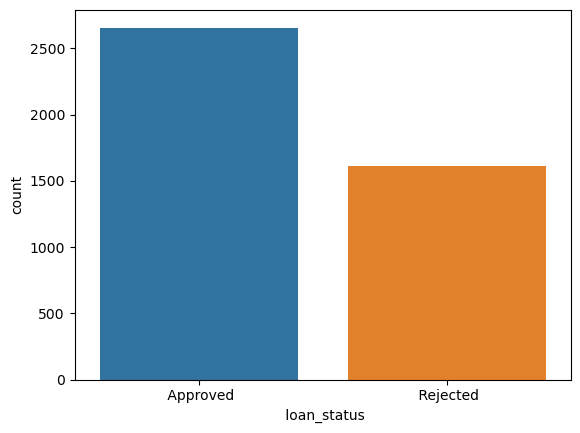

In [28]:
sns.countplot(data=data,x=' loan_status')

In [29]:
df = data[data[" self_employed"]==" Yes"]
selfEmp,cols = df.shape

In [32]:
loanAprvd,cols= df[df[" loan_status"]==" Approved"].shape

Chances of getting loan approved if you are self-employed.

In [34]:
print('Chances of getting loan approved if you are self-employed is: ', loanAprvd/selfEmp)

Chances of getting loan approved if you are self-employeed is:  0.6223255813953489


In [35]:
df = data[data[" education"]==" Graduate"]
Graduate,cols = df.shape
loanAprvd,cols= df[df[" loan_status"]==" Approved"].shape

Chances of getting loan approved if you are a Graduate.

In [39]:
print('Chances of getting loan approved if you are a Graduate is: ', loanAprvd/Graduate)

Chances of getting loan approved if you are a Graduate is:  0.6245335820895522


Average Cibil score to get loan approved

In [45]:
df=data[data[' loan_status']==' Approved']

In [47]:
avgCibil=df[' cibil_score'].mean()

In [48]:
print("Average Cibil Score you need to have to get your loan approved: ",avgCibil)

Average Cibil Score you need to have to get your loan approved:  703.4619728915662


In [52]:
encode=LabelEncoder()
data[' education']=encode.fit_transform(data[' education'])
data[' self_employed']=encode.fit_transform(data[' self_employed'])
data[' loan_status']=encode.fit_transform(data[' loan_status'])

In [53]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [73]:
numcol = []
for col in data.columns:
    if data[col].dtypes == "int64":
        numcol.append(col)

In [74]:
scaler = MinMaxScaler()
for col in numcol:
    data[[col]] = scaler.fit_transform(data[[col]])
    
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0.0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1.0,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0.0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0.0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1.0,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [75]:
df=data.drop('loan_id',axis=1)

In [76]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0.0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1.0,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0.0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0.0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1.0,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [77]:
x=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [79]:
model=LogisticRegression()

In [80]:
model.fit(x_train,y_train)

LogisticRegression()

In [81]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [82]:
print("Training dataset accuracy: ",accuracy_score(y_train,train_pred))
print("Testing dataset accuracy: ",accuracy_score(y_test,test_pred))

Training dataset accuracy:  0.9185944363103953
Testing dataset accuracy:  0.9121779859484778


In [83]:
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

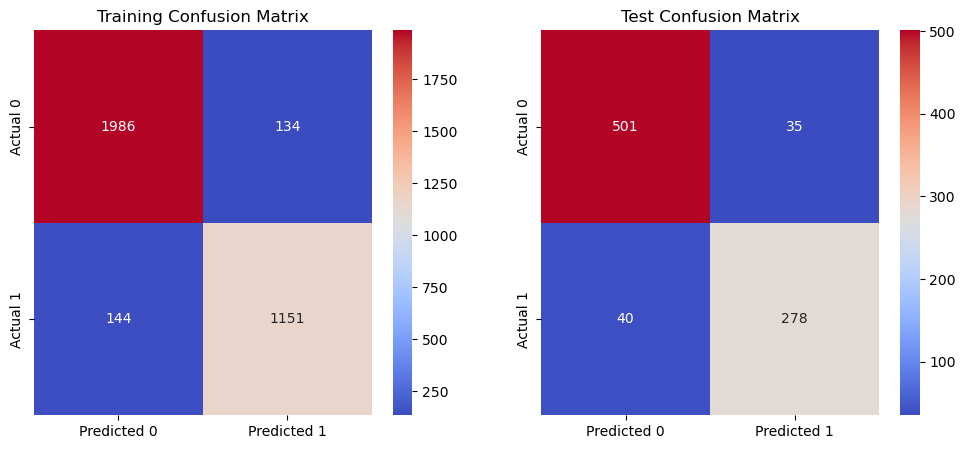

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[0].set_title("Training Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

# Decision Tree

In [89]:
model=DecisionTreeClassifier()

In [90]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [92]:
print("Training dataset accuracy: ",accuracy_score(y_train,train_pred))
print("Testing dataset accuracy: ",accuracy_score(y_test,test_pred))

Training dataset accuracy:  1.0
Testing dataset accuracy:  0.9789227166276346


In [93]:
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

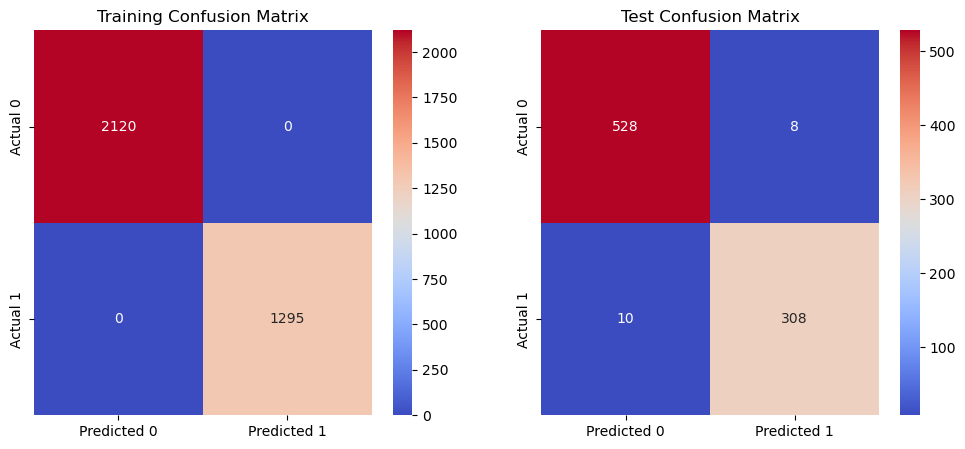

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[0].set_title("Training Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

# Random Forest

In [95]:
model=RandomForestClassifier()

In [96]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [98]:
print("Training dataset accuracy: ",accuracy_score(y_train,train_pred))
print("Testing dataset accuracy: ",accuracy_score(y_test,test_pred))

Training dataset accuracy:  1.0
Testing dataset accuracy:  0.977751756440281


In [99]:
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

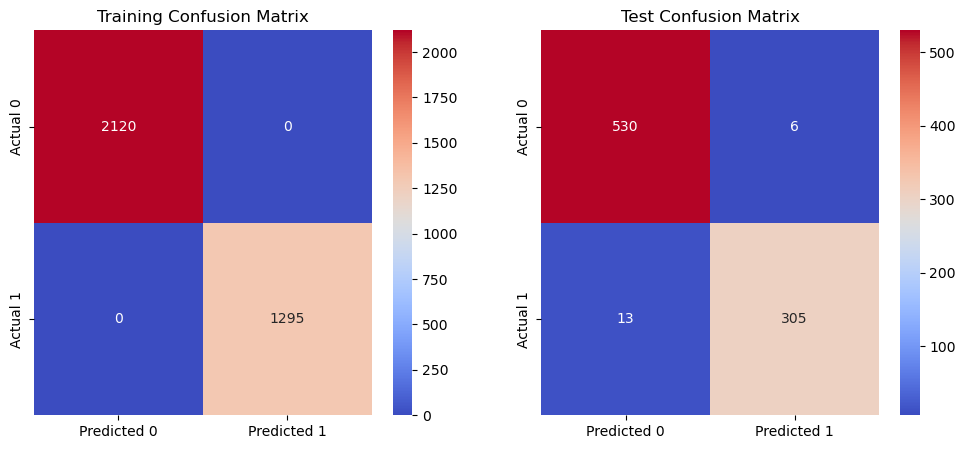

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[0].set_title("Training Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

# Support Vector Machine

In [101]:
model=SVC()

In [102]:
model.fit(x_train,y_train)

SVC()

In [103]:
train_pred= model.predict(x_train)
test_pred= model.predict(x_test)

In [104]:
print("Training dataset accuracy: ",accuracy_score(y_train,train_pred))
print("Testing dataset accuracy: ",accuracy_score(y_test,test_pred))

Training dataset accuracy:  0.950805270863836
Testing dataset accuracy:  0.927400468384075


In [105]:
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

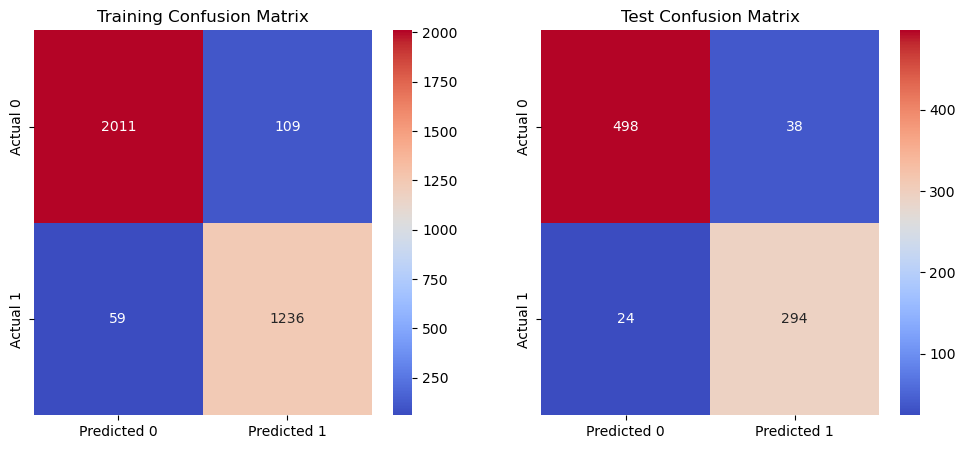

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[0].set_title("Training Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

# XGBoost

In [114]:
model = xgb.XGBClassifier()

In [115]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print("Training dataset accuracy:", train_accuracy)
print("Testing dataset accuracy:", test_accuracy)

Training dataset accuracy: 1.0
Testing dataset accuracy: 0.9824355971896955


In [119]:
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

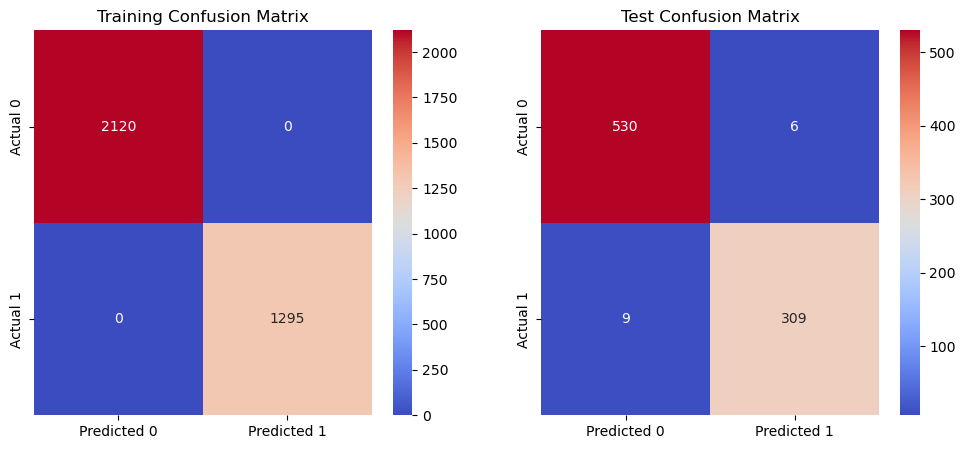

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[1])
axes[0].set_title("Training Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

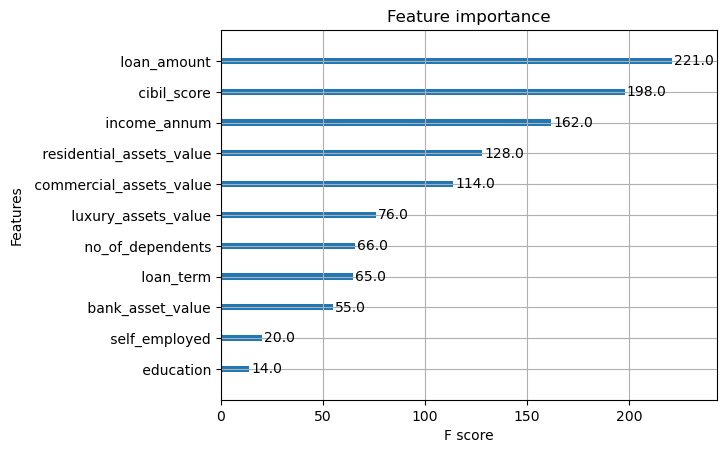

In [123]:
plot_importance(model)
plt.show()